In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 10.5})

In [2]:
def FonsecaFlemingExp(x, a=True):
    if a:
        return np.exp(np.sum(np.negative((x + np.full_like(x, -1./math.sqrt(2)))**2)))
    else:
        return np.exp(np.sum(np.negative((x + np.full_like(x, 1./math.sqrt(2)))**2)))

def FonsecaFleming(x):
    fa = np.negative(np.expm1(np.sum(np.negative((x + np.full_like(x, -1./math.sqrt(2)))**2))))
    fb = np.negative(np.expm1(np.sum(np.negative((x + np.full_like(x, 1./math.sqrt(2)))**2))))
    return np.asarray([fa, fb])

def FonsecaFlemingJac(x):
    Ja = np.multiply(2 * (x + np.full_like(x, -1./math.sqrt(2))), FonsecaFlemingExp(x, True))
    Jb = np.multiply(2 * (x + np.full_like(x, 1./math.sqrt(2))), FonsecaFlemingExp(x, False))
    return np.asarray([Ja, Jb])

def runif_in_simplex(n):
  ''' Return uniformly random vector in the n-simplex '''
  k = np.random.exponential(scale=1.0, size=n)
  return k / sum(k)

In [19]:
def StocSearch(dim =2, max_inner_iter=100, max_outer_iter=5000):
    front =[]
    for j in range(max_outer_iter):
        z = np.random.uniform(low=-4., high=4., size=dim)
        xi = runif_in_simplex(2)
        # front.append(FonsecaFleming(z))
        for i in range(max_inner_iter):
            # xi = 2.*np.random.binomial(n=1, p=0.5, size=dim) - 1.
            v = np.random.randn(dim)
            a = np.dot(xi, FonsecaFlemingJac(z))
            z -= (1/(1+i)) * v.dot(a) * v
            # np.clip(z, -4., 4.)
        front.append(FonsecaFleming(z))
    return np.asarray(front)

f = StocSearch()

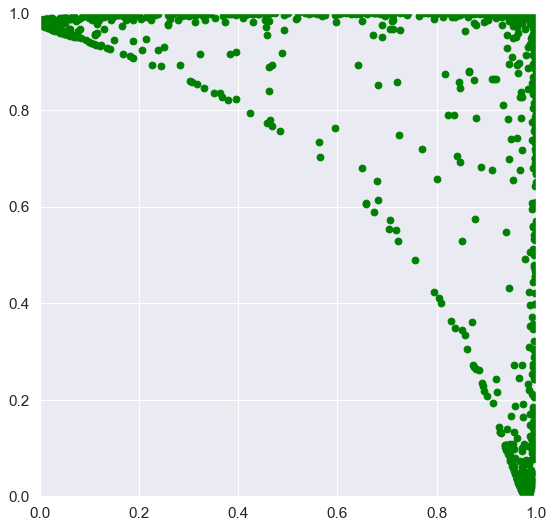

In [20]:
plt.figure(1, figsize=(8, 8), dpi=80)
plt.axis([0., 1., 0., 1.])
# plt.scatter(f[0, 0], f[0, 1], color='r')
plt.scatter(f[:, 0], f[:, 1], color='g')